35241306.15012057


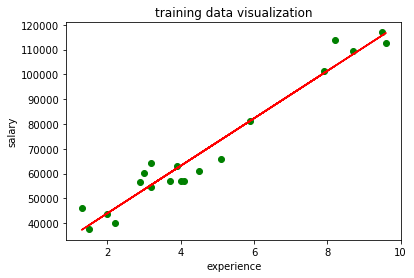

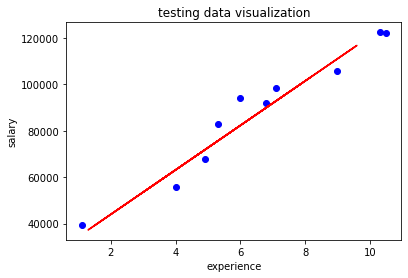

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv("C:/Users/komma/Downloads/datasets/datasets/Salary_Data.csv")
data.head()

X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.33, random_state=4)

lin_reg = LinearRegression()
lin_reg.fit(X_Train, Y_Train)

Y_Pred = lin_reg.predict(X_Test)
print(metrics.mean_squared_error(Y_Test,Y_Pred))

plt.scatter(X_Train, Y_Train, color = "green")
plt.plot(X_Train, lin_reg.predict(X_Train), color = "red")
plt.xlabel("experience")
plt.ylabel("salary")
plt.title("training data visualization")
plt.show()


plt.scatter(X_Test, Y_Test, color = "blue")
plt.plot(X_Train, lin_reg.predict(X_Train), color = "red")
plt.title("testing data visualization")
plt.xlabel("experience")
plt.ylabel("salary")
plt.show()

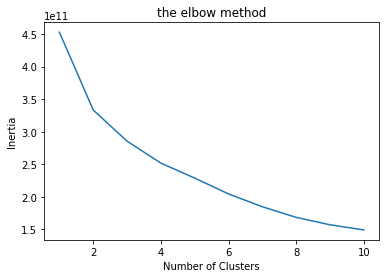

0.4272072267584384


In [3]:
#2
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import metrics 
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("C:/Users/komma/Downloads/datasets/datasets//K-Mean_Dataset.csv")
data.head()

X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.2,random_state = 0)

data.isnull().sum()

le = LabelEncoder() 
data['CUST_ID'] = le.fit_transform(data.CUST_ID.values) 
X_new= data.fillna(data.mean())

data.head()

Inertia = [] 
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=9,random_state=3) 
    kmeans.fit(X_new) 
    Inertia.append(kmeans.inertia_)

plt.plot(range(1,11),Inertia) 
plt.title('the elbow method') 
plt.xlabel('Number of Clusters') 
plt.ylabel('Inertia') 
plt.show()

n_clusters = 2
kmeans = KMeans(n_clusters = n_clusters) 
kmeans.fit(X_new)

y_kmeans = kmeans.predict(X_new) 
score = metrics.silhouette_score(X_new, y_kmeans) 
print(score)

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import metrics 
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.read_csv("C:/Users/komma/Downloads/datasets/datasets//K-Mean_Dataset.csv")
data.head()

X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.2,random_state = 0)

data.isnull().sum()

le = LabelEncoder() 
data['CUST_ID'] = le.fit_transform(data.CUST_ID.values) 
X_new= data.fillna(data.mean())

data.head()

Inertia = [] 
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=9,random_state=3) 
    kmeans.fit(X_new)
Inertia.append(kmeans.inertia_)
scaler = StandardScaler()
scaler.fit(X_new)
X_scaled_array = scaler.transform(X_new)
X_scaled = pd.DataFrame(X_scaled_array, columns = X_new.columns)

nclusters = 2 
km = KMeans(n_clusters=nclusters)
km.fit(X_scaled)

y_cluster_kmeans = km.predict(X_scaled)
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print(score)

0.1919748976345269
